In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from tensorflow import keras
import tensorflow as tf

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

## For CNN we need 3D images

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1)
X_test = X_test.reshape((10000, 28, 28, 1)

## Normalization

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test

In [9]:
np.random.seed(50)
tf.random.set_seed(50)

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 32,
                             kernel_size = (3,3),
                             strides = 1,
                             padding = "valid",
                             activation = "relu",
                             input_shape = (28, 28, 1)))

model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten()) #flattern is use to convert 3D array to 1D array
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [13]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [14]:
model_history = model.fit(X_train, y_train, epochs = 20, batch_size = 64, validation_data = (X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 40s 41ms/step - loss: 0.8839 - accuracy: 0.7041 - val_loss: 0.6064 - val_accuracy: 0.7730
Epoch 2/20
860/860 [==============================] - 35s 41ms/step - loss: 0.5337 - accuracy: 0.8063 - val_loss: 0.5257 - val_accuracy: 0.8040
Epoch 3/20
860/860 [==============================] - 37s 43ms/step - loss: 0.4723 - accuracy: 0.8299 - val_loss: 0.4935 - val_accuracy: 0.8158
Epoch 4/20
860/860 [==============================] - 35s 41ms/step - loss: 0.4358 - accuracy: 0.8443 - val_loss: 0.5210 - val_accuracy: 0.8076
Epoch 5/20
860/860 [==============================] - 30s 35ms/step - loss: 0.4110 - accuracy: 0.8529 - val_loss: 0.4251 - val_accuracy: 0.8514
Epoch 6/20
860/860 [==============================] - 30s 35ms/step - loss: 0.3871 - accuracy: 0.8613 - val_loss: 0.3812 - val_accuracy: 0.8630
Epoch 7/20
860/860 [==============================] - 30s 35ms/step - loss: 0.3681 - accuracy: 0.8681 - val_loss: 0.3651 - val_accuracy:

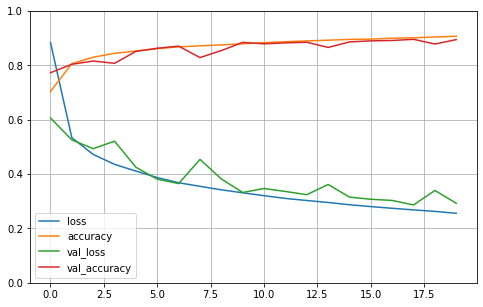

In [15]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
ev = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3110 - accuracy: 0.8883


In [17]:
X_new = X_test[:3]

In [18]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 224ms/step


array([[2.3164099e-05, 4.5077027e-06, 1.0404230e-05, 5.1929073e-06,
        3.6104582e-05, 4.1274750e-03, 2.1141799e-05, 1.7324887e-02,
        5.4033374e-04, 9.7790682e-01],
       [4.0385905e-05, 1.5786451e-08, 9.9753630e-01, 6.9782777e-07,
        1.7459078e-03, 5.3127285e-09, 6.7641085e-04, 1.1260639e-11,
        2.3790581e-07, 8.4056045e-10],
       [9.2306703e-07, 9.9998009e-01, 1.7369591e-07, 1.0161416e-05,
        8.0530272e-06, 4.8290019e-07, 9.3186550e-08, 1.0971554e-08,
        5.6557214e-10, 2.0657558e-10]], dtype=float32)

In [19]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [27]:
classes = pd.DataFrame(class_name)
classes

,0
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


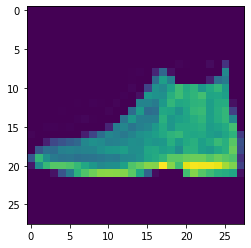

In [21]:
plt.imshow(X_new[0].reshape(28,28))

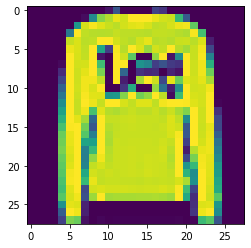

In [28]:
plt.imshow(X_new[1].reshape(28,28))

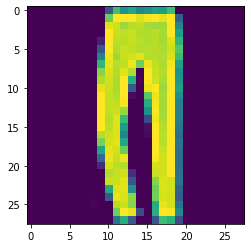

In [30]:
plt.imshow(X_new[2].reshape(28,28))